Data Generation
===

In [1]:
%matplotlib inline

import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as plt

In [2]:
n, d, k = 100, 2, 2

In [3]:
X = rand(n, d)

In [4]:
means = [rand(d) for _ in range(k)]

S_tmp = randn(d, d) / (d * 10) # rescaling for ease of visualization
S = np.dot(S_tmp, S_tmp.T) # this will be PSD

sigmas = [S]*k # we'll use the same sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.81844893,  0.53506409]), array([ 0.72638645,  0.90579872])]
[array([[  7.87563997e-03,  -3.85784570e-05],
       [ -3.85784570e-05,   1.29442840e-03]]), array([[  7.87563997e-03,  -3.85784570e-05],
       [ -3.85784570e-05,   1.29442840e-03]])]


Solution
===

In [5]:
def compute_log_p(X, mean, sigma):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

In [6]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)] # exercise: try to do this without looping

In [7]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0]


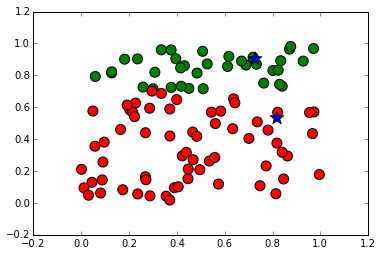

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(['red', 'green'])[assignments], s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()